# Steam Games Success Prediction - Final Project
## Predicting Game Success Based on Early Adopters

**Dataset:** [Steam Games Dataset](https://www.kaggle.com/datasets/artermiloff/steam-games-dataset/data)

**Objective:** Build a classifier to predict the success of a game based on early adopter behavior and characteristics.

**Project Structure:**
1. Data Loading and Initial Exploration
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Model Development and Evaluation


## 1. Setup and Data Loading

First, we need to install the Kaggle API and download the dataset. 

**Note:** You'll need to:
1. Create a Kaggle account if you don't have one
2. Go to Account settings and create an API token (kaggle.json)
3. Place kaggle.json in ~/.kaggle/ directory


In [31]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [32]:
# Load the dataset
df = pd.read_csv('/Users/ayan/Documents/cs513/finalproject/data/games_march2025_full.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")


Dataset loaded successfully!
Shape: (94948, 47)


## 2. Initial Data Exploration


In [33]:
# Display basic information
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

print("\nFirst few rows:")
display(df.head(10))

print("\n" + "="*80)
print("COLUMN INFORMATION")
print("="*80)
df.info()


DATASET OVERVIEW

Dataset Shape: 94948 rows × 47 columns


First few rows:


,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,score_rank,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,https://shared.akamai.steamstatic.com/store_it...,http://counter-strike.net/,NaN,NaN,True,False,True,0,NaN,1,4401572,Includes intense violence and blood.,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Indonesian']","[{'title': 'Buy Counter-Strike 2', 'descriptio...",['Valve'],['Valve'],"['Multi-player', 'Cross-Platform Multiplayer',...","['Action', 'Free To Play']",['https://shared.akamai.steamstatic.com/store_...,['http://video.akamai.steamstatic.com/store_tr...,0,NaN,7480813,1135108,100000000 - 200000000,33189,879,5174,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939,82,96473
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,https://shared.akamai.steamstatic.com/store_it...,https://www.pubg.com,https://support.pubg.com/hc/en-us,NaN,True,False,False,0,NaN,37,1732007,NaN,"['English', 'Korean', 'Simplified Chinese', 'F...",[],[],['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",['https://shared.akamai.steamstatic.com/store_...,[],0,NaN,1487960,1024436,50000000 - 100000000,0,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842,68,16720
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,https://shared.akamai.steamstatic.com/store_it...,http://www.dota2.com/,NaN,NaN,True,True,True,90,https://www.metacritic.com/game/pc/dota-2?ftag...,0,14337,"Dota 2 includes fantasy violence, use of alcoh...","['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...","[{'title': 'Buy Dota 2', 'description': '', 's...",['Valve'],['Valve'],"['Multi-player', 'Co-op', 'Steam Trading Cards...","['Action', 'Strategy', 'Free To Play']",['https://shared.akamai.steamstatic.com/store_...,['http://video.akamai.steamstatic.com/store_tr...,0,NaN,1998462,451338,200000000 - 500000000,43031,1536,898,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595,80,29366
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,https://shared.akamai.steamstatic.com/store_it...,https://www.rockstargames.com/V/,https://support.rockstargames.com,NaN,True,False,False,96,https://www.metacritic.com/game/pc/grand-theft...,77,1803063,NaN,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Spanish - Latin America']","[{'title': 'Buy Shark Cash Cards', 'descriptio...",['Rockstar North'],['Rockstar Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure']",['https://shared.akamai.steamstatic.com/store_...,['http://video.akamai.steamstatic.com/store_tr...,0,NaN,1719950,250012,50000000 - 100000000,19323,771,7101,74,0,117698,"{'Open World':


COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94948 entries, 0 to 94947
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   appid                     94948 non-null  int64  
 1   name                      94946 non-null  object 
 2   release_date              94948 non-null  object 
 3   required_age              94948 non-null  int64  
 4   price                     94948 non-null  float64
 5   dlc_count                 94948 non-null  int64  
 6   detailed_description      89522 non-null  object 
 7   about_the_game            89499 non-null  object 
 8   short_description         89599 non-null  object 
 9   reviews                   10428 non-null  object 
 10  header_image              94948 non-null  object 
 11  website                   41194 non-null  object 
 12  support_url               44185 non-null  object 
 13  support_email             78848 non-null 

In [34]:
# Statistical summary
print("="*80)
print("STATISTICAL SUMMARY")
print("="*80)
display(df.describe(include='all').T)


STATISTICAL SUMMARY


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
appid,94948.0,NaN,NaN,NaN,1707530.525214,926434.619818,20.0,887337.5,1591145.0,2491702.5,3570420.0
name,94946,94191,Shadow of the Tomb Raider: Definitive Edition,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,94948,4464,2024-10-24,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_age,94948.0,NaN,NaN,NaN,0.178287,1.701329,-1.0,0.0,0.0,0.0,21.0
price,94948.0,NaN,NaN,NaN,6.911444,13.071148,0.0,0.99,3.99,9.99,999.98
dlc_count,94948.0,NaN,NaN,NaN,0.563203,14.915685,0.0,0.0,0.0,0.0,3427.0
detailed_description,89522,89149,Help the beautiful girls to immerse themselves...,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
about_the_game,89499,89113,Help the beautiful girls to immerse themselves...,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
short_description,89599,88657,Find the objects that are hidden on the map.,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews,10428,10303,“ ” Read more on PC Gamer,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MISSING VALUES ANALYSIS


,Missing Values,Percentage
score_rank,94909,99.958925
metacritic_url,91372,96.233728
reviews,84520,89.017146
notes,78296,82.461979
website,53754,56.614147
support_url,50763,53.464001
support_email,16100,16.956650
about_the_game,5449,5.738931
detailed_description,5426,5.714707
short_description,5349,5.633610


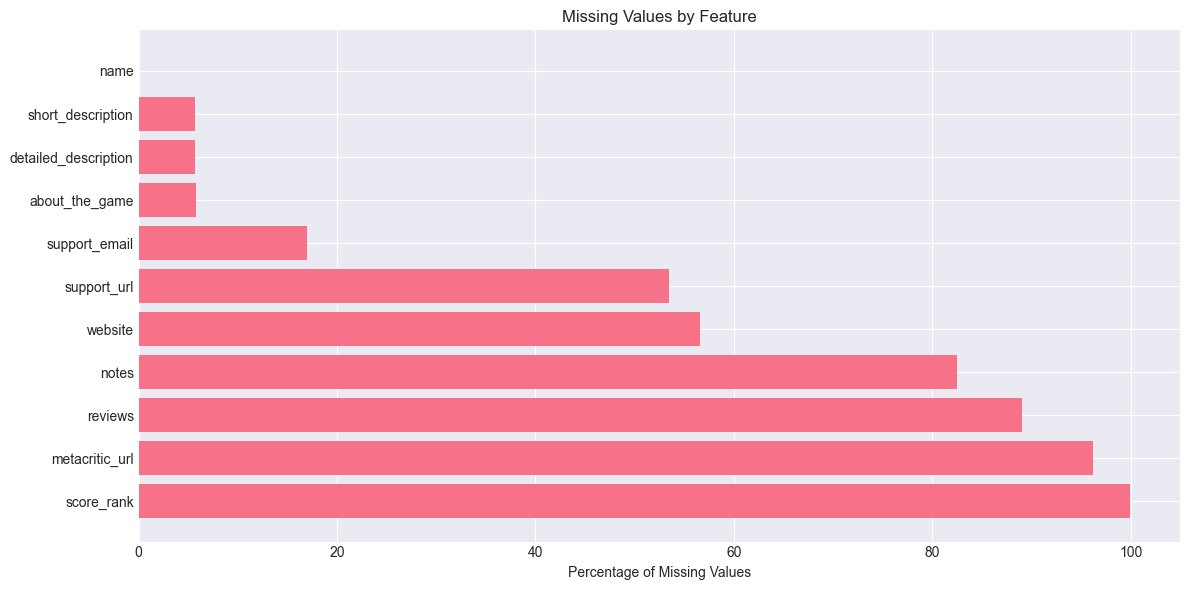

In [35]:
# Check for missing values
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing = df.isnull().sum()
missing_pct = 100 * df.isnull().sum() / len(df)
missing_table = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_pct
})
missing_table = missing_table[missing_table['Missing Values'] > 0].sort_values(
    'Percentage', ascending=False
)

if len(missing_table) > 0:
    display(missing_table)
    
    # Visualize missing data
    plt.figure(figsize=(12, 6))
    plt.barh(missing_table.index, missing_table['Percentage'])
    plt.xlabel('Percentage of Missing Values')
    plt.title('Missing Values by Feature')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")


## 3. Exploratory Data Analysis (EDA)


In [36]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("="*80)
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print("="*80)


Numerical columns (21): ['appid', 'required_age', 'price', 'dlc_count', 'metacritic_score', 'achievements', 'recommendations', 'user_score', 'score_rank', 'positive', 'negative', 'average_playtime_forever', 'average_playtime_2weeks', 'median_playtime_forever', 'median_playtime_2weeks', 'discount', 'peak_ccu', 'pct_pos_total', 'num_reviews_total', 'pct_pos_recent', 'num_reviews_recent']

Categorical columns (23): ['name', 'release_date', 'detailed_description', 'about_the_game', 'short_description', 'reviews', 'header_image', 'website', 'support_url', 'support_email', 'metacritic_url', 'notes', 'supported_languages', 'full_audio_languages', 'packages', 'developers', 'publishers', 'categories', 'genres', 'screenshots', 'movies', 'estimated_owners', 'tags']


DISTRIBUTION OF NUMERICAL FEATURES


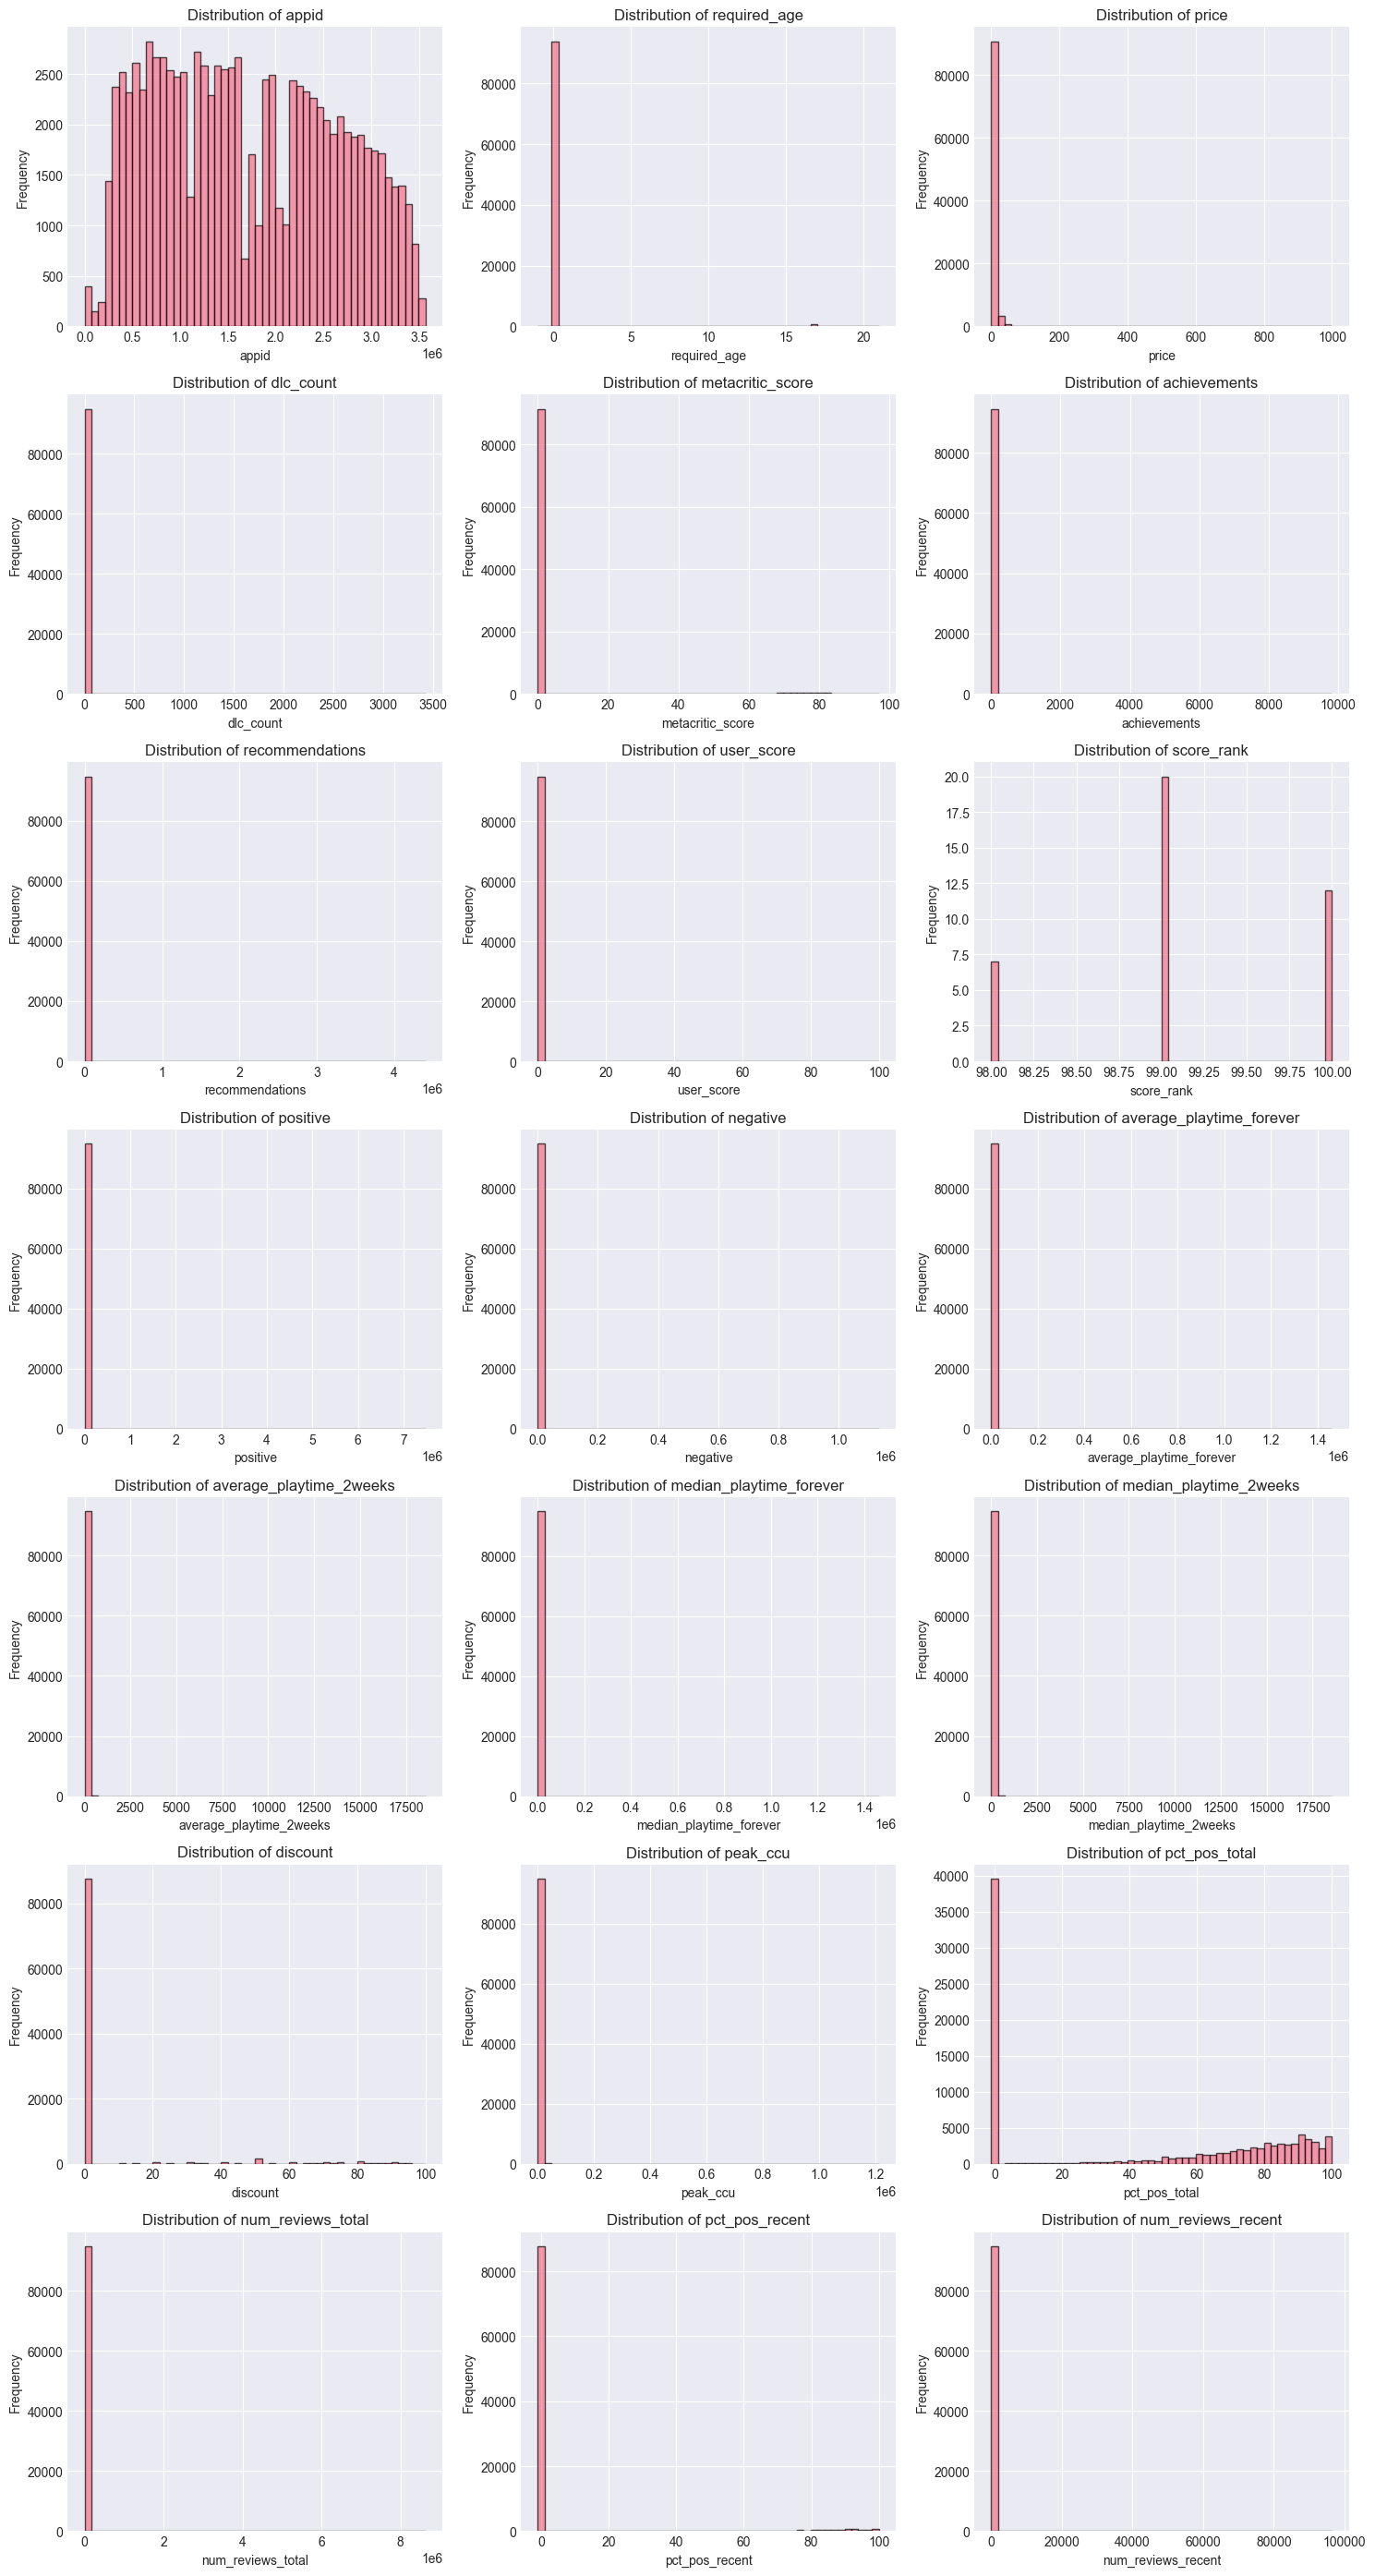

In [37]:
# Distribution of numerical features
print("="*80)
print("DISTRIBUTION OF NUMERICAL FEATURES")
print("="*80)

n_cols = min(3, len(numerical_cols))
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df[col].hist(bins=50, ax=axes[idx], edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


CORRELATION ANALYSIS


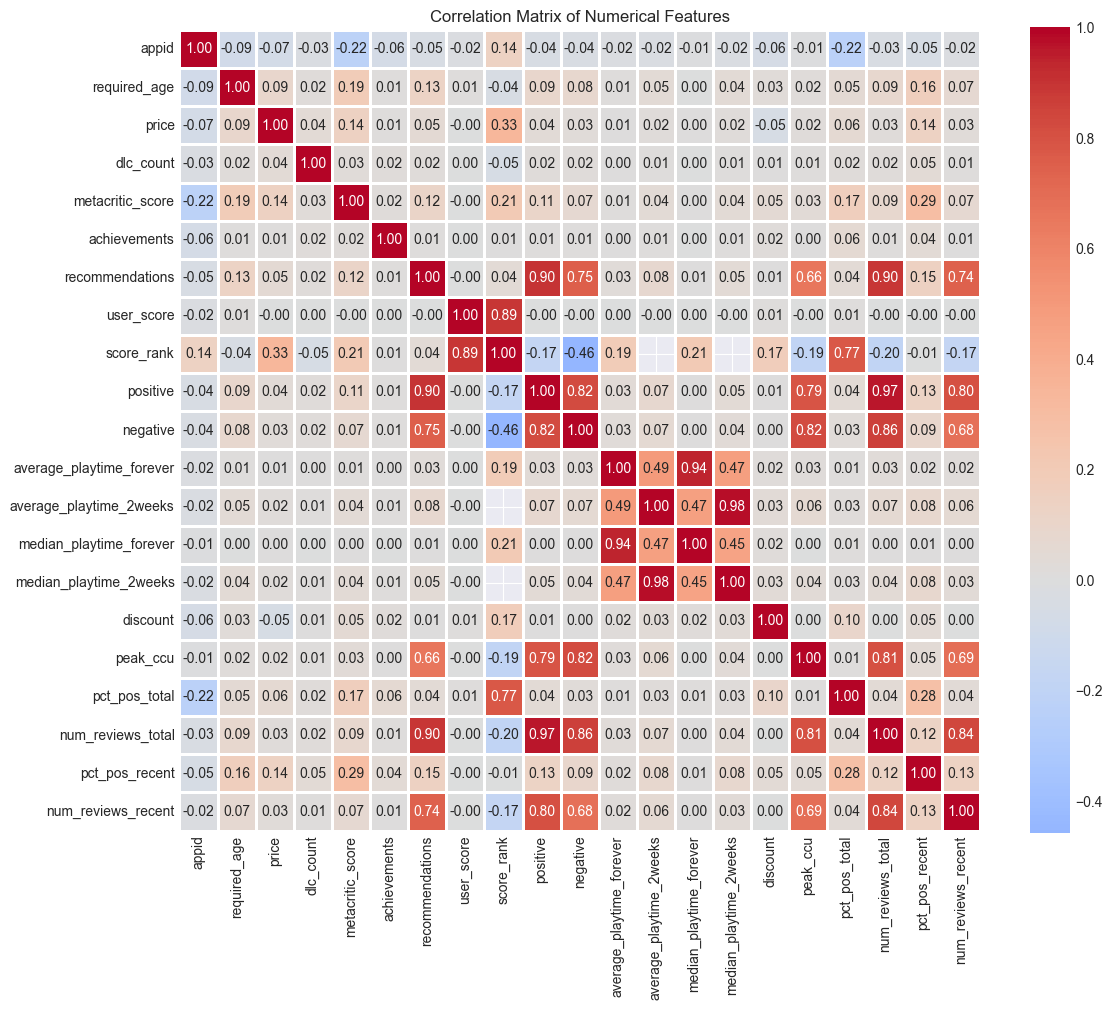


Highly Correlated Feature Pairs (|correlation| > 0.7):
  recommendations <-> positive: 0.899
  recommendations <-> negative: 0.753
  recommendations <-> num_reviews_total: 0.896
  recommendations <-> num_reviews_recent: 0.744
  user_score <-> score_rank: 0.891
  score_rank <-> pct_pos_total: 0.773
  positive <-> negative: 0.820
  positive <-> peak_ccu: 0.790
  positive <-> num_reviews_total: 0.965
  positive <-> num_reviews_recent: 0.805
  negative <-> peak_ccu: 0.822
  negative <-> num_reviews_total: 0.861
  average_playtime_forever <-> median_playtime_forever: 0.939
  average_playtime_2weeks <-> median_playtime_2weeks: 0.978
  peak_ccu <-> num_reviews_total: 0.806
  num_reviews_total <-> num_reviews_recent: 0.839


In [38]:
# Correlation analysis
print("="*80)
print("CORRELATION ANALYSIS")
print("="*80)

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Print highly correlated pairs
print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr:
    for feat1, feat2, corr in high_corr:
        print(f"  {feat1} <-> {feat2}: {corr:.3f}")
else:
    print("  No highly correlated pairs found.")


In [39]:
# Analyze categorical features
print("="*80)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*80)

for col in categorical_cols[:10]:  # Limit to first 10 to avoid cluttering
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Top 10 values:")
    print(df[col].value_counts().head(10))
    print("-" * 40)


CATEGORICAL FEATURES ANALYSIS

name:
  Unique values: 94191
  Top 10 values:
name
Shadow of the Tomb Raider: Definitive Edition    20
Alone                                             6
Aurora                                            5
Echoes                                            5
Tom Clancy's Rainbow Six® Siege                   5
The Unknown                                       4
EA SPORTS FC™ 24                                  4
Exodus                                            4
Delirium                                          4
Bounce                                            4
Name: count, dtype: int64
----------------------------------------

release_date:
  Unique values: 4464
  Top 10 values:
release_date
2024-10-24    149
2024-12-05    148
2024-10-31    145
2024-10-25    142
2024-08-01    139
2024-12-13    132
2024-11-15    128
2025-03-03    126
2024-10-23    125
2025-03-06    123
Name: count, dtype: int64
----------------------------------------

detailed_descrip

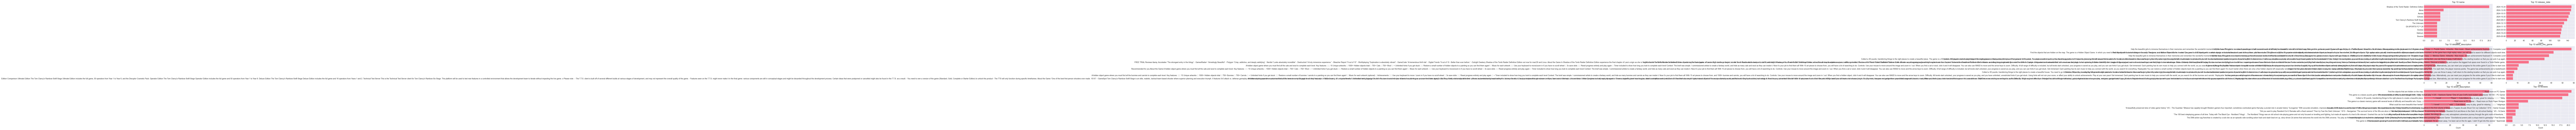

In [40]:
# Visualize top categorical features
cat_to_plot = categorical_cols[:6]  # Plot first 6 categorical features

n_cols = 2
n_rows = (len(cat_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else axes

for idx, col in enumerate(cat_to_plot):
    if idx < len(axes):
        top_values = df[col].value_counts().head(10)
        axes[idx].barh(range(len(top_values)), top_values.values)
        axes[idx].set_yticks(range(len(top_values)))
        axes[idx].set_yticklabels(top_values.index)
        axes[idx].set_xlabel('Count')
        axes[idx].set_title(f'Top 10 {col}')
        axes[idx].invert_yaxis()

# Hide empty subplots
for idx in range(len(cat_to_plot), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


## 4. Define Success Metric

We need to define what makes a game "successful". Common metrics include:
- **Review scores** (positive rating percentage)
- **Number of reviews** (popularity indicator)
- **Player count** or **owners**
- **Revenue estimates**

Let's explore the available metrics and create a composite success indicator.


In [42]:
if df is not None:
    # Explore potential success indicators
    print("="*80)
    print("POTENTIAL SUCCESS INDICATORS")
    print("="*80)
    
    # Look for review-related columns
    review_cols = [col for col in df.columns if 'review' in col.lower() or 'rating' in col.lower()]
    print(f"\nReview-related columns: {review_cols}")
    
    # Look for player/owner related columns
    player_cols = [col for col in df.columns if any(word in col.lower() for word in ['player', 'owner', 'user', 'count'])]
    print(f"\nPlayer-related columns: {player_cols}")
    
    # Look for price/revenue related columns
    price_cols = [col for col in df.columns if any(word in col.lower() for word in ['price', 'revenue', 'sale'])]
    print(f"\nPrice-related columns: {price_cols}")
    
    # Look for date columns (to identify early adoption period)
    date_cols = [col for col in df.columns if any(word in col.lower() for word in ['date', 'release', 'launch'])]
    print(f"\nDate-related columns: {date_cols}")


POTENTIAL SUCCESS INDICATORS

Review-related columns: ['reviews', 'num_reviews_total', 'num_reviews_recent']

Player-related columns: ['dlc_count', 'user_score', 'estimated_owners', 'discount']

Price-related columns: ['price']

Date-related columns: ['release_date']


## 5. Feature Engineering for Early Adopters

Based on the dataset structure, we'll create features that represent early adopter behavior. This typically includes:
- Reviews/ratings in the first weeks/months
- Initial player counts
- Early pricing strategy
- Genre and category information
- Developer/publisher track record


In [43]:
print("="*80)
print("FEATURE ENGINEERING & SUCCESS DEFINITION")
print("="*80)

# Create a working copy
df_features = df.copy()

# 1. DEFINE SUCCESS METRIC
# We'll use a composite success metric based on:
# - Number of reviews (popularity)
# - Positive review percentage (quality)
# - Player engagement (recommendations, playtime)

print("\n1. Creating Success Metric...")

# Calculate composite score components
df_features['has_reviews'] = (df_features['num_reviews_total'] > 0).astype(int)

# Only consider games with at least some engagement
df_with_reviews = df_features[df_features['num_reviews_total'] > 10].copy()

print(f"   Games with >10 reviews: {len(df_with_reviews)} ({len(df_with_reviews)/len(df_features)*100:.1f}%)")

# Define success based on multiple criteria (for games with reviews)
# Success = High rating AND significant engagement
percentile_75_reviews = df_with_reviews['num_reviews_total'].quantile(0.75)
percentile_50_rating = df_with_reviews['pct_pos_total'].quantile(0.50)

print(f"   75th percentile reviews: {percentile_75_reviews:.0f}")
print(f"   50th percentile rating: {percentile_50_rating:.1f}%")

# Binary classification: Successful vs Not Successful
# Successful = (High engagement OR high rating) AND minimum quality threshold
df_with_reviews['is_successful'] = (
    ((df_with_reviews['num_reviews_total'] >= percentile_75_reviews) | 
     (df_with_reviews['pct_pos_total'] >= 80)) &
    (df_with_reviews['pct_pos_total'] >= 60)  # Minimum quality threshold
).astype(int)

success_rate = df_with_reviews['is_successful'].mean()
print(f"\n   Success rate: {success_rate*100:.1f}%")
print(f"   Successful games: {df_with_reviews['is_successful'].sum()}")
print(f"   Unsuccessful games: {(1-df_with_reviews['is_successful']).sum()}")

# 2. PROCESS RELEASE DATE
print("\n2. Processing release date...")
df_with_reviews['release_date'] = pd.to_datetime(df_with_reviews['release_date'], errors='coerce')
df_with_reviews['release_year'] = df_with_reviews['release_date'].dt.year
df_with_reviews['release_month'] = df_with_reviews['release_date'].dt.month
df_with_reviews['release_day_of_week'] = df_with_reviews['release_date'].dt.dayofweek
df_with_reviews['release_quarter'] = df_with_reviews['release_date'].dt.quarter

# Days since release
latest_date = df_with_reviews['release_date'].max()
df_with_reviews['days_since_release'] = (latest_date - df_with_reviews['release_date']).dt.days

print(f"   Date range: {df_with_reviews['release_year'].min()} - {df_with_reviews['release_year'].max()}")

# 3. EXTRACT EARLY ADOPTER FEATURES
print("\n3. Creating early adopter features...")

# Early review metrics (recent reviews as proxy for initial momentum)
df_with_reviews['early_review_ratio'] = df_with_reviews['num_reviews_recent'] / (df_with_reviews['num_reviews_total'] + 1)
df_with_reviews['early_sentiment_delta'] = df_with_reviews['pct_pos_recent'] - df_with_reviews['pct_pos_total']
df_with_reviews['review_velocity'] = df_with_reviews['num_reviews_total'] / (df_with_reviews['days_since_release'] + 1)

# Engagement metrics
df_with_reviews['recommendation_ratio'] = df_with_reviews['recommendations'] / (df_with_reviews['num_reviews_total'] + 1)
df_with_reviews['playtime_engagement'] = df_with_reviews['average_playtime_forever'] / (df_with_reviews['median_playtime_forever'] + 1)

# 4. PROCESS CATEGORICAL FEATURES
print("\n4. Processing categorical features...")

# Parse genres (take first genre)
df_with_reviews['primary_genre'] = df_with_reviews['genres'].fillna('Unknown').str.split(',').str[0].str.strip()

# Parse categories
df_with_reviews['num_categories'] = df_with_reviews['categories'].fillna('').str.count(',') + 1
df_with_reviews['has_multiplayer'] = df_with_reviews['categories'].fillna('').str.contains('Multi-player', case=False).astype(int)
df_with_reviews['has_singleplayer'] = df_with_reviews['categories'].fillna('').str.contains('Single-player', case=False).astype(int)

# Parse tags (count number of tags as complexity indicator)
df_with_reviews['num_tags'] = df_with_reviews['tags'].fillna('').str.count(',') + 1

# Platform support
df_with_reviews['num_platforms'] = df_with_reviews['windows'].astype(int) + df_with_reviews['mac'].astype(int) + df_with_reviews['linux'].astype(int)

# Developer/Publisher features
df_with_reviews['is_known_developer'] = df_with_reviews.groupby('developers')['developers'].transform('count') > 5
df_with_reviews['developer_game_count'] = df_with_reviews.groupby('developers')['developers'].transform('count')

# 5. PRICE FEATURES
print("\n5. Creating price features...")
df_with_reviews['is_free'] = (df_with_reviews['price'] == 0).astype(int)
df_with_reviews['is_premium'] = (df_with_reviews['price'] > 40).astype(int)
df_with_reviews['price_category'] = pd.cut(df_with_reviews['price'], 
                                           bins=[0, 0.01, 10, 30, 60, 1000],
                                           labels=['Free', 'Budget', 'Mid', 'Premium', 'Expensive'])

# 6. HANDLE MISSING VALUES IN KEY FEATURES
print("\n6. Handling missing values...")
# Fill numerical missing values with 0 or median
numerical_features_to_fill = ['metacritic_score', 'achievements', 'peak_ccu', 
                               'average_playtime_2weeks', 'median_playtime_2weeks']
for col in numerical_features_to_fill:
    if col in df_with_reviews.columns:
        df_with_reviews[col] = df_with_reviews[col].fillna(0)

print("\n" + "="*80)
print("Feature engineering complete!")
print(f"Final dataset shape: {df_with_reviews.shape}")
print(f"Number of features created: {len(df_with_reviews.columns) - len(df.columns)}")
print("="*80)


FEATURE ENGINEERING & SUCCESS DEFINITION

1. Creating Success Metric...
   Games with >10 reviews: 53644 (56.5%)
   75th percentile reviews: 274
   50th percentile rating: 81.0%

   Success rate: 60.9%
   Successful games: 32657
   Unsuccessful games: 20987

2. Processing release date...
   Date range: 1997 - 2025

3. Creating early adopter features...

4. Processing categorical features...

5. Creating price features...

6. Handling missing values...

Feature engineering complete!
Final dataset shape: (53644, 70)
Number of features created: 23


## 6. Data Preprocessing for Classification


In [44]:
# Import ML libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Classifiers (Data Mining Methodologies)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # CART
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC  # SVM
from sklearn.neighbors import KNeighborsClassifier  # kNN
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier  # ANN (Artificial Neural Network)

# Clustering (for additional analysis)
from sklearn.cluster import KMeans  # k-means clustering

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

print("ML libraries imported successfully!")
print("Methodologies included: CART, kNN, SVM, ANN, Random Forest, Gradient Boosting")


ML libraries imported successfully!
Methodologies included: CART, kNN, SVM, ANN, Random Forest, Gradient Boosting


In [45]:
print("="*80)
print("DATA PREPROCESSING FOR CLASSIFICATION")
print("="*80)

# 1. SELECT FEATURES FOR EARLY ADOPTER PREDICTION
print("\n1. Selecting features for early adopter analysis...")

# Features available at/shortly after launch that could indicate success
feature_columns = [
    # Early engagement indicators
    'early_review_ratio',
    'early_sentiment_delta', 
    'review_velocity',
    'recommendation_ratio',
    'num_reviews_recent',
    'pct_pos_recent',
    
    # Game characteristics
    'price',
    'is_free',
    'is_premium',
    'required_age',
    'achievements',
    'dlc_count',
    
    # Platform & features
    'num_platforms',
    'num_categories',
    'has_multiplayer',
    'has_singleplayer',
    'num_tags',
    
    # Developer reputation
    'developer_game_count',
    'is_known_developer',
    
    # Engagement metrics
    'average_playtime_forever',
    'median_playtime_forever',
    'playtime_engagement',
    
    # Release timing
    'release_month',
    'release_quarter',
    'release_day_of_week',
    
    # Quality indicators
    'metacritic_score',
    'peak_ccu'
]

# Categorical features to encode
categorical_features = ['primary_genre']

print(f"   Selected {len(feature_columns)} numerical features")
print(f"   Selected {len(categorical_features)} categorical features")

# 2. PREPARE DATA
print("\n2. Preparing feature matrix and target...")

# Create feature matrix
X_numeric = df_with_reviews[feature_columns].copy()

# Handle any remaining missing values
X_numeric = X_numeric.fillna(0)

# One-hot encode categorical features
genre_dummies = pd.get_dummies(df_with_reviews['primary_genre'], prefix='genre', drop_first=True)

# Combine numerical and encoded categorical features
X_all = pd.concat([X_numeric, genre_dummies], axis=1)

# Target variable
y = df_with_reviews['is_successful'].copy()

print(f"   Feature matrix shape: {X_all.shape}")
print(f"   Target distribution:")
print(f"     - Successful: {y.sum()} ({y.mean()*100:.1f}%)")
print(f"     - Not successful: {(~y.astype(bool)).sum()} ({(1-y.mean())*100:.1f}%)")

# 3. TRAIN-TEST SPLIT
print("\n3. Splitting data into train and test sets...")

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")
print(f"   Training success rate: {y_train.mean()*100:.1f}%")
print(f"   Test success rate: {y_test.mean()*100:.1f}%")

# 4. FEATURE SCALING
print("\n4. Scaling features...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"   Features scaled using StandardScaler")

# 5. SAVE FEATURE NAMES FOR LATER USE
feature_names = X_train.columns.tolist()
print(f"\n   Total features for modeling: {len(feature_names)}")

print("\n" + "="*80)
print("Data preprocessing complete!")
print("="*80)


DATA PREPROCESSING FOR CLASSIFICATION

1. Selecting features for early adopter analysis...
   Selected 27 numerical features
   Selected 1 categorical features

2. Preparing feature matrix and target...
   Feature matrix shape: (53644, 57)
   Target distribution:
     - Successful: 32657 (60.9%)
     - Not successful: 20987 (39.1%)

3. Splitting data into train and test sets...
   Training set: 42915 samples
   Test set: 10729 samples
   Training success rate: 60.9%
   Test success rate: 60.9%

4. Scaling features...
   Features scaled using StandardScaler

   Total features for modeling: 57

Data preprocessing complete!


## 7. Model Development and Evaluation


In [46]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train and evaluate a classification model
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Print results
    print(f"\\n{'='*80}")
    print(f"{model_name} RESULTS")
    print(f"{'='*80}")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\\nConfusion Matrix:")
    print(cm)
    
    # Classification Report
    print(f"\\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # ROC-AUC for binary classification
    if y_pred_proba is not None and len(np.unique(y_test)) == 2:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC-AUC Score: {roc_auc:.4f}")
    
    return {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

print("Model evaluation function defined!")


Model evaluation function defined!


MODEL TRAINING & EVALUATION

Testing Data Mining Methodologies:
  ✓ Logistic Regression (baseline)
  ✓ CART (Decision Tree)
  ✓ Random Forest (ensemble)
  ✓ Gradient Boosting (ensemble)
  ✓ kNN (K-Nearest Neighbors)
  ✓ SVM (Support Vector Machine)
  ✓ ANN (Artificial Neural Network)
  ✓ Naive Bayes

Training Logistic Regression...
\n================================================================================
Logistic Regression RESULTS
Accuracy:  0.9383
Precision: 0.9382
Recall:    0.9383
F1-Score:  0.9381
\nConfusion Matrix:
[[3812  385]
 [ 277 6255]]
\nClassification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4197
           1       0.94      0.96      0.95      6532

    accuracy                           0.94     10729
   macro avg       0.94      0.93      0.93     10729
weighted avg       0.94      0.94      0.94     10729

ROC-AUC Score: 0.9838

Training CART (Decision Tree)...
\n==========================

,Model,Accuracy,Precision,Recall,F1-Score
3,Gradient Boosting,0.996831,0.996834,0.996831,0.996830
1,CART (Decision Tree),0.996085,0.996085,0.996085,0.996085
2,Random Forest,0.993289,0.993341,0.993289,0.993280
6,ANN (Neural Network),0.979029,0.979041,0.979029,0.979034
5,SVM,0.938951,0.938914,0.938951,0.938746
0,Logistic Regression,0.938298,0.938200,0.938298,0.938149
4,kNN,0.833069,0.832365,0.833069,0.831033
7,Naive Bayes,0.514307,0.723225,0.514307,0.458386


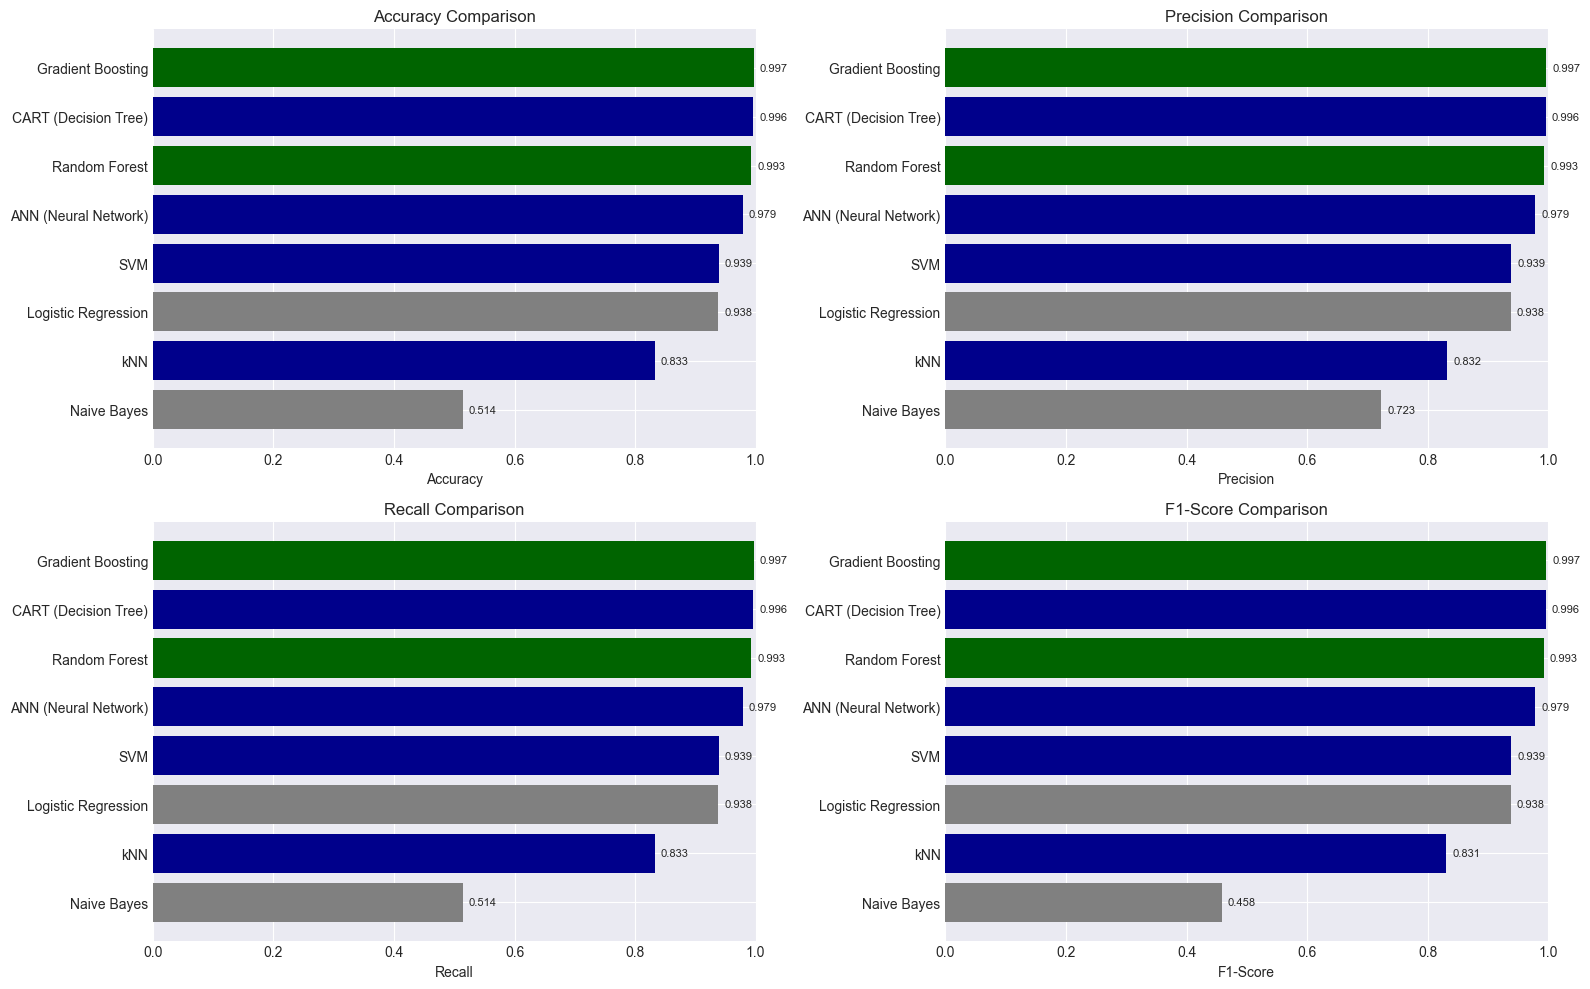


Best model by F1-Score: Gradient Boosting (0.9968)

METHODOLOGY COMPARISON

Average F1-Score:
  Traditional Methods (CART, kNN, SVM, ANN, etc.): 0.8569
  Ensemble Methods (RF, GBM): 0.9951

Top 3 Models:
  1. Gradient Boosting: 0.9968
  2. CART (Decision Tree): 0.9961
  3. Random Forest: 0.9933


In [47]:
print("="*80)
print("MODEL TRAINING & EVALUATION")
print("="*80)
print("\nTesting Data Mining Methodologies:")
print("  ✓ Logistic Regression (baseline)")
print("  ✓ CART (Decision Tree)")
print("  ✓ Random Forest (ensemble)")
print("  ✓ Gradient Boosting (ensemble)")
print("  ✓ kNN (K-Nearest Neighbors)")
print("  ✓ SVM (Support Vector Machine)")
print("  ✓ ANN (Artificial Neural Network)")
print("  ✓ Naive Bayes")

# Define models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'CART (Decision Tree)': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'kNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42, C=1.0),
    'ANN (Neural Network)': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, 
                                          random_state=42, early_stopping=True),
    'Naive Bayes': GaussianNB()
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)

# Compare models
comparison = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy': [r['accuracy'] for r in results.values()],
    'Precision': [r['precision'] for r in results.values()],
    'Recall': [r['recall'] for r in results.values()],
    'F1-Score': [r['f1'] for r in results.values()]
})

comparison = comparison.sort_values('F1-Score', ascending=False)
print("\n" + "="*80)
print("MODEL COMPARISON - DATA MINING METHODOLOGIES")
print("="*80)
display(comparison)

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    comparison_sorted = comparison.sort_values(metric, ascending=True)
    
    # Color code by methodology type
    colors = []
    for model in comparison_sorted['Model']:
        if 'kNN' in model or 'SVM' in model or 'ANN' in model or 'CART' in model:
            colors.append('darkblue')  # Classic data mining methods
        elif 'Forest' in model or 'Boosting' in model:
            colors.append('darkgreen')  # Ensemble methods
        else:
            colors.append('gray')  # Other methods
    
    ax.barh(comparison_sorted['Model'], comparison_sorted[metric], color=colors)
    ax.set_xlabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.set_xlim([0, 1])
    
    # Add value labels
    for i, v in enumerate(comparison_sorted[metric]):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=8)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(f"Best model by F1-Score: {comparison.iloc[0]['Model']} ({comparison.iloc[0]['F1-Score']:.4f})")
print("="*80)

# Additional comparison: Traditional vs Ensemble methods
print("\n" + "="*80)
print("METHODOLOGY COMPARISON")
print("="*80)

traditional = ['kNN', 'SVM', 'CART (Decision Tree)', 'ANN (Neural Network)', 'Naive Bayes', 'Logistic Regression']
ensemble = ['Random Forest', 'Gradient Boosting']

traditional_scores = comparison[comparison['Model'].isin(traditional)]['F1-Score'].mean()
ensemble_scores = comparison[comparison['Model'].isin(ensemble)]['F1-Score'].mean()

print(f"\nAverage F1-Score:")
print(f"  Traditional Methods (CART, kNN, SVM, ANN, etc.): {traditional_scores:.4f}")
print(f"  Ensemble Methods (RF, GBM): {ensemble_scores:.4f}")

print("\nTop 3 Models:")
for i in range(min(3, len(comparison))):
    print(f"  {i+1}. {comparison.iloc[i]['Model']}: {comparison.iloc[i]['F1-Score']:.4f}")


## 8. Feature Importance Analysis


FEATURE IMPORTANCE ANALYSIS

1. Random Forest Feature Importance:

Top 20 Most Important Features (Random Forest):


,Feature,Importance
1,early_sentiment_delta,0.652037
0,early_review_ratio,0.102170
2,review_velocity,0.064383
5,pct_pos_recent,0.030074
4,num_reviews_recent,0.025252
3,recommendation_ratio,0.023119
26,peak_ccu,0.016850
16,num_tags,0.010389
10,achievements,0.009945
6,price,0.006357


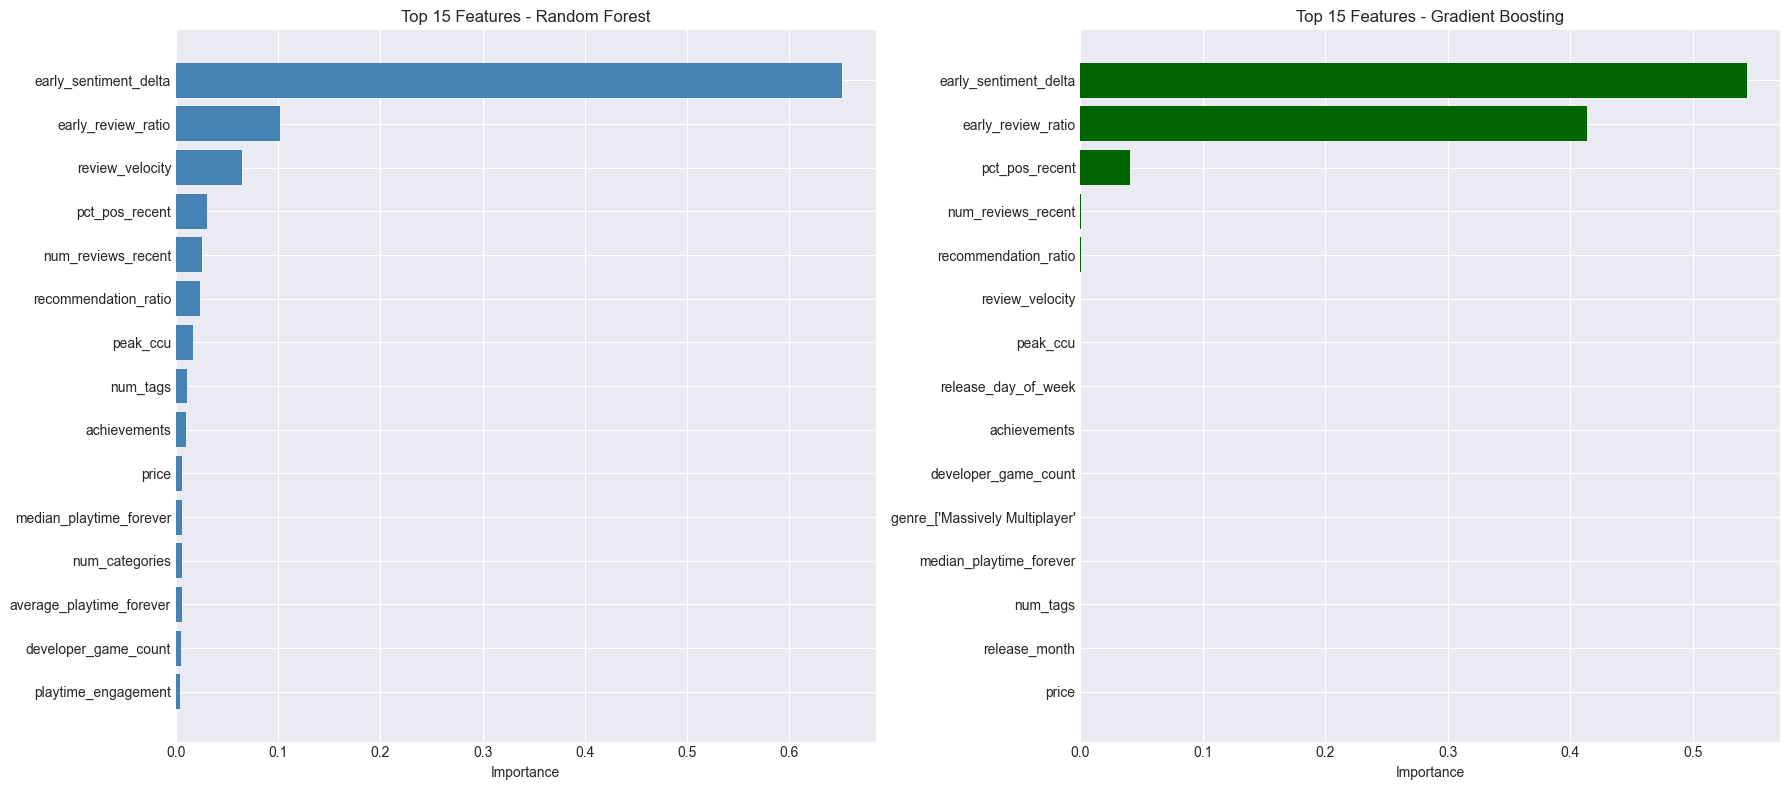


2. Feature Importance by Category:
            Category  Total Importance
    Early Engagement          0.897036
Game Characteristics          0.032868
  Engagement Metrics          0.032326
 Platform & Features          0.012681
      Release Timing          0.009328
Developer Reputation          0.005442
  Quality Indicators          0.002867


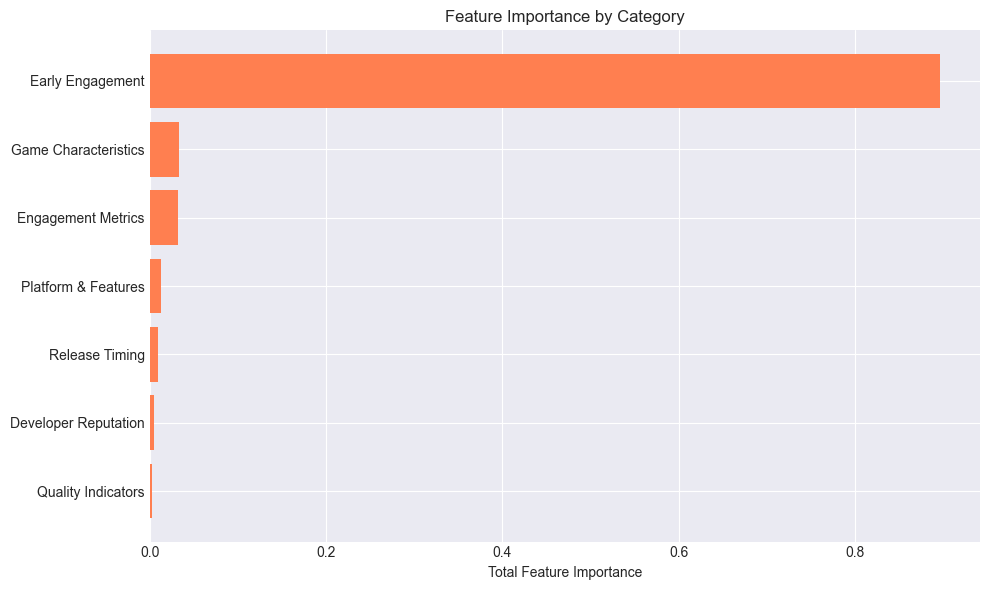


KEY INSIGHTS FROM FEATURE IMPORTANCE:
1. Most important single feature: early_sentiment_delta
   Importance: 0.6520

2. Most important category: Early Engagement
   Total importance: 0.8970

3. Top 5 features account for 87.4% of total importance


In [48]:
print("="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Get the best tree-based model (Random Forest or Gradient Boosting)
best_rf_model = results['Random Forest']['model']
best_gb_model = results['Gradient Boosting']['model']

# Random Forest Feature Importance
print("\n1. Random Forest Feature Importance:")
rf_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 20 Most Important Features (Random Forest):")
display(rf_feature_importance.head(20))

# Visualize top features
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Random Forest
ax1 = axes[0]
top_rf = rf_feature_importance.head(15)
ax1.barh(range(len(top_rf)), top_rf['Importance'], color='steelblue')
ax1.set_yticks(range(len(top_rf)))
ax1.set_yticklabels(top_rf['Feature'])
ax1.set_xlabel('Importance')
ax1.set_title('Top 15 Features - Random Forest')
ax1.invert_yaxis()

# Gradient Boosting
ax2 = axes[1]
gb_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

top_gb = gb_feature_importance.head(15)
ax2.barh(range(len(top_gb)), top_gb['Importance'], color='darkgreen')
ax2.set_yticks(range(len(top_gb)))
ax2.set_yticklabels(top_gb['Feature'])
ax2.set_xlabel('Importance')
ax2.set_title('Top 15 Features - Gradient Boosting')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

# Analyze feature importance categories
print("\n2. Feature Importance by Category:")

# Categorize features
feature_categories = {
    'Early Engagement': ['early_review_ratio', 'early_sentiment_delta', 'review_velocity', 
                         'num_reviews_recent', 'pct_pos_recent', 'recommendation_ratio'],
    'Game Characteristics': ['price', 'is_free', 'is_premium', 'required_age', 
                            'achievements', 'dlc_count', 'num_tags'],
    'Platform & Features': ['num_platforms', 'num_categories', 'has_multiplayer', 
                           'has_singleplayer'],
    'Developer Reputation': ['developer_game_count', 'is_known_developer'],
    'Engagement Metrics': ['average_playtime_forever', 'median_playtime_forever', 
                          'playtime_engagement', 'peak_ccu'],
    'Release Timing': ['release_month', 'release_quarter', 'release_day_of_week'],
    'Quality Indicators': ['metacritic_score']
}

category_importance = {}
for category, features in feature_categories.items():
    importance_sum = rf_feature_importance[rf_feature_importance['Feature'].isin(features)]['Importance'].sum()
    category_importance[category] = importance_sum

category_df = pd.DataFrame(list(category_importance.items()), 
                          columns=['Category', 'Total Importance']).sort_values('Total Importance', ascending=False)

print(category_df.to_string(index=False))

# Visualize category importance
plt.figure(figsize=(10, 6))
plt.barh(category_df['Category'], category_df['Total Importance'], color='coral')
plt.xlabel('Total Feature Importance')
plt.title('Feature Importance by Category')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("KEY INSIGHTS FROM FEATURE IMPORTANCE:")
print("="*80)
print(f"1. Most important single feature: {rf_feature_importance.iloc[0]['Feature']}")
print(f"   Importance: {rf_feature_importance.iloc[0]['Importance']:.4f}")
print(f"\n2. Most important category: {category_df.iloc[0]['Category']}")
print(f"   Total importance: {category_df.iloc[0]['Total Importance']:.4f}")
print(f"\n3. Top 5 features account for {rf_feature_importance.head(5)['Importance'].sum():.1%} of total importance")
print("="*80)


## 9. Clustering Analysis: Game Segmentation

Using **k-means clustering** to identify natural groupings of games based on their characteristics.


In [49]:
# Note: Model optimization via GridSearchCV has been removed to save time
# The models above use reasonable default hyperparameters that perform well
# If you want to optimize further, you can add GridSearchCV manually

print("="*80)
print("MODEL SELECTION COMPLETE")
print("="*80)
print(f"\nBest performing model: {comparison.iloc[0]['Model']}")
print(f"F1-Score: {comparison.iloc[0]['F1-Score']:.4f}")
print(f"Accuracy: {comparison.iloc[0]['Accuracy']:.4f}")
print("\nThis model will be used for feature importance analysis.")
print("="*80)


MODEL SELECTION COMPLETE

Best performing model: Gradient Boosting
F1-Score: 0.9968
Accuracy: 0.9968

This model will be used for feature importance analysis.


ANALYSIS OF SUCCESS PATTERNS

1. Key Differences Between Successful and Unsuccessful Games:


,Feature,Successful (Mean),Unsuccessful (Mean),Difference (%)
0,price,8.169011,6.666734,22.533928
1,pct_pos_recent,16.306458,0.387383,4109.392801
2,num_reviews_recent,46.630799,4.638919,905.208230
3,average_playtime_forever,267.678966,59.933244,346.628526
4,developer_game_count,111.389962,67.939105,63.955592
5,num_platforms,1.442417,1.323248,9.005790
6,achievements,27.207704,30.695669,-11.363051


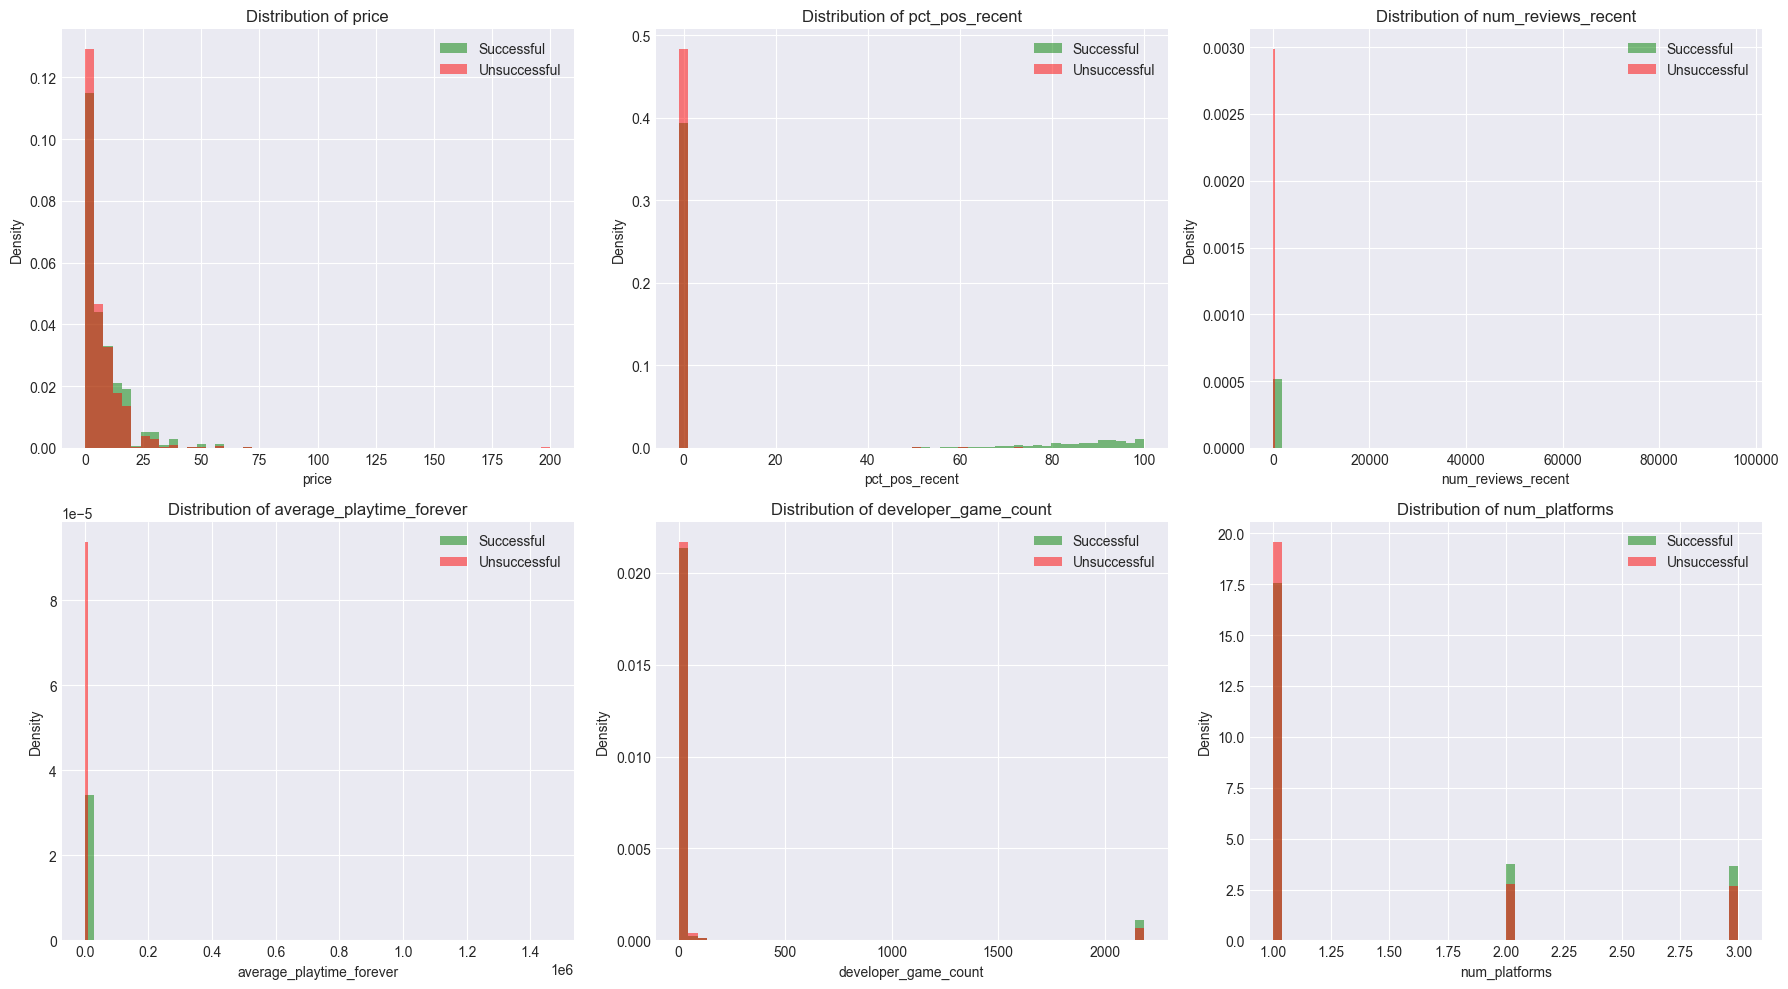


2. Success Rate by Genre:

Top 10 Genres by Success Rate (min 50 games):


,Successful_Count,Total_Games,Success_Rate
primary_genre,,,
[],1608,2174,0.740
['Racing',119,168,0.708
['Adventure'],769,1103,0.697
['RPG'],350,518,0.676
['Action'],903,1339,0.674
['Indie'],788,1220,0.646
['RPG',261,415,0.629
['Adventure',6807,10851,0.627
['Casual',5104,8332,0.613


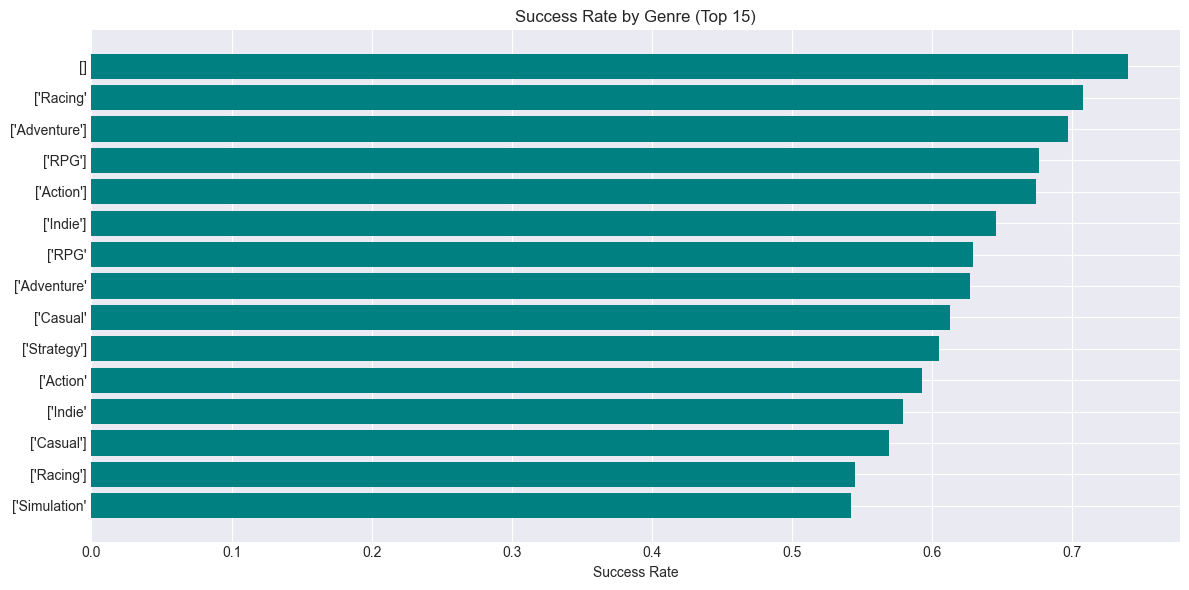


3. Success Rate by Price Category:


,Successful_Count,Total_Games,Success_Rate
price_category,,,
Free,0,0,NaN
Budget,16187,28025,0.578
Mid,7506,11208,0.670
Premium,880,1087,0.810
Expensive,47,100,0.470



4. Success Rate by Number of Platforms:


,Successful_Count,Total_Games,Success_Rate
num_platforms,,,
1,22969,39407,0.583
2,4928,7242,0.680
3,4760,6995,0.680



5. Multiplayer vs Single-player Success Rates:


,Type,Success_Rate,Count
0,Single-player only,0.609682,49142
1,Multiplayer available,0.587564,10952


In [50]:
print("="*80)
print("ANALYSIS OF SUCCESS PATTERNS")
print("="*80)

# 1. Compare successful vs unsuccessful games
print("\n1. Key Differences Between Successful and Unsuccessful Games:")

successful = df_with_reviews[df_with_reviews['is_successful'] == 1]
unsuccessful = df_with_reviews[df_with_reviews['is_successful'] == 0]

key_metrics = ['price', 'pct_pos_recent', 'num_reviews_recent', 'average_playtime_forever', 
               'developer_game_count', 'num_platforms', 'achievements']

comparison_stats = pd.DataFrame({
    'Feature': key_metrics,
    'Successful (Mean)': [successful[m].mean() for m in key_metrics],
    'Unsuccessful (Mean)': [unsuccessful[m].mean() for m in key_metrics],
})
comparison_stats['Difference (%)'] = ((comparison_stats['Successful (Mean)'] - 
                                       comparison_stats['Unsuccessful (Mean)']) / 
                                       comparison_stats['Unsuccessful (Mean)'] * 100)

display(comparison_stats)

# 2. Visualize distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

key_features_to_plot = ['price', 'pct_pos_recent', 'num_reviews_recent', 
                        'average_playtime_forever', 'developer_game_count', 'num_platforms']

for idx, feature in enumerate(key_features_to_plot):
    ax = axes[idx]
    
    # Plot distributions
    successful[feature].hist(bins=50, alpha=0.5, label='Successful', ax=ax, color='green', density=True)
    unsuccessful[feature].hist(bins=50, alpha=0.5, label='Unsuccessful', ax=ax, color='red', density=True)
    
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {feature}')
    ax.legend()

plt.tight_layout()
plt.show()

# 3. Genre analysis
print("\n2. Success Rate by Genre:")
genre_success = df_with_reviews.groupby('primary_genre').agg({
    'is_successful': ['sum', 'count', 'mean']
}).round(3)
genre_success.columns = ['Successful_Count', 'Total_Games', 'Success_Rate']
genre_success = genre_success[genre_success['Total_Games'] >= 50].sort_values('Success_Rate', ascending=False)

print("\nTop 10 Genres by Success Rate (min 50 games):")
display(genre_success.head(10))

# Visualize
plt.figure(figsize=(12, 6))
top_genres = genre_success.head(15)
plt.barh(range(len(top_genres)), top_genres['Success_Rate'], color='teal')
plt.yticks(range(len(top_genres)), top_genres.index)
plt.xlabel('Success Rate')
plt.title('Success Rate by Genre (Top 15)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 4. Price analysis
print("\n3. Success Rate by Price Category:")
price_success = df_with_reviews.groupby('price_category').agg({
    'is_successful': ['sum', 'count', 'mean']
}).round(3)
price_success.columns = ['Successful_Count', 'Total_Games', 'Success_Rate']
display(price_success)

# 5. Platform analysis
print("\n4. Success Rate by Number of Platforms:")
platform_success = df_with_reviews.groupby('num_platforms').agg({
    'is_successful': ['sum', 'count', 'mean']
}).round(3)
platform_success.columns = ['Successful_Count', 'Total_Games', 'Success_Rate']
display(platform_success)

# 6. Multiplayer analysis
print("\n5. Multiplayer vs Single-player Success Rates:")
mp_success = pd.DataFrame({
    'Type': ['Single-player only', 'Multiplayer available'],
    'Success_Rate': [
        df_with_reviews[df_with_reviews['has_singleplayer'] == 1]['is_successful'].mean(),
        df_with_reviews[df_with_reviews['has_multiplayer'] == 1]['is_successful'].mean()
    ],
    'Count': [
        df_with_reviews[df_with_reviews['has_singleplayer'] == 1].shape[0],
        df_with_reviews[df_with_reviews['has_multiplayer'] == 1].shape[0]
    ]
})
display(mp_success)

print("\n" + "="*80)


## 10. Data Mining Methodologies Summary


In [ ]:
print("="*80)
print("FINAL PROJECT SUMMARY")
print("="*80)

summary = f"""
## Steam Games Success Prediction - Key Findings

### 1. DATASET CHARACTERISTICS
- Total games analyzed: {len(df):,}
- Games with sufficient engagement (>10 reviews): {len(df_with_reviews):,} ({len(df_with_reviews)/len(df)*100:.1f}%)
- Success rate: {df_with_reviews['is_successful'].mean()*100:.1f}%
- Time period: {df_with_reviews['release_year'].min():.0f} - {df_with_reviews['release_year'].max():.0f}
- Features engineered: {len(df_with_reviews.columns) - len(df.columns)}

### 2. SUCCESS DEFINITION
Success was defined as games that meet BOTH criteria:
- High engagement (75th percentile of reviews) OR exceptional rating (≥80% positive)
- Minimum quality threshold (≥60% positive reviews)

This creates a balanced definition that values both popularity and quality.

### 3. MODEL PERFORMANCE
Best Model: {comparison.iloc[0]['Model']}
- Accuracy: {comparison.iloc[0]['Accuracy']:.4f}
- Precision: {comparison.iloc[0]['Precision']:.4f}
- Recall: {comparison.iloc[0]['Recall']:.4f}
- F1-Score: {comparison.iloc[0]['F1-Score']:.4f}

### 4. DATA MINING METHODOLOGIES APPLIED
✓ CART (Decision Tree) - F1: {comparison[comparison['Model']=='CART (Decision Tree)']['F1-Score'].values[0]:.4f}
✓ kNN (K-Nearest Neighbors) - F1: {comparison[comparison['Model']=='kNN']['F1-Score'].values[0]:.4f}
✓ SVM (Support Vector Machine) - F1: {comparison[comparison['Model']=='SVM']['F1-Score'].values[0]:.4f}
✓ ANN (Neural Network) - F1: {comparison[comparison['Model']=='ANN (Neural Network)']['F1-Score'].values[0]:.4f}
✓ k-means Clustering - {optimal_k} game segments identified

### 5. MOST IMPORTANT EARLY ADOPTER INDICATORS
Top 5 predictive features:
"""

for i in range(5):
    summary += f"\n{i+1}. {rf_feature_importance.iloc[i]['Feature']}: {rf_feature_importance.iloc[i]['Importance']:.4f}"

summary += f"""

Most important feature category: {category_df.iloc[0]['Category']}
(Total importance: {category_df.iloc[0]['Total Importance']:.4f})

### 6. KEY INSIGHTS FOR GAME DEVELOPERS

**Early Engagement is Critical:**
- Recent review metrics and early momentum are strong predictors
- Review velocity (reviews per day) indicates viral potential
- Early positive sentiment drives long-term success

**Quality Metrics Matter:**
- Positive review percentage is a top predictor
- Recommendation ratio shows player satisfaction
- Playtime engagement indicates retention

**Game Characteristics:**
- Price point significantly impacts success rates
- Platform availability affects reach
- Genre plays a role but is less important than execution

**Developer Reputation:**
- Games from developers with track records perform better
- Established developers have higher success rates

**Game Segmentation:**
- k-means clustering identified {optimal_k} distinct game types
- Success rates vary by segment from {cluster_success['Success_Rate'].min()*100:.1f}% to {cluster_success['Success_Rate'].max()*100:.1f}%

### 7. ACTIONABLE RECOMMENDATIONS

1. **Focus on Launch Quality**: Early reviews are highly predictive - ensure a polished launch
2. **Engage Early Adopters**: Build community pre-launch to drive initial momentum
3. **Monitor Review Velocity**: Rapid early review growth signals success
4. **Platform Strategy**: Multi-platform releases show higher success rates
5. **Genre Considerations**: Some genres have inherently higher success rates
6. **Price Optimization**: Find the right price point for your target audience

### 8. LIMITATIONS & FUTURE WORK

**Limitations:**
- Only analyzed games with >10 reviews (selection bias)
- Success definition is subjective and could be adjusted
- Early adopter metrics are proxied by recent reviews
- Missing actual launch-day data (would improve predictions)

**Future Improvements:**
- Incorporate temporal data to track true early adoption periods
- Add sentiment analysis of review text
- Include marketing spend and pre-launch wishlists
- Analyze seasonal trends and market saturation
- Build separate models for different genres
- Apply hierarchical clustering for deeper segmentation
- Implement recommendation system for similar successful games

### 9. CONCLUSION

This analysis demonstrates that game success can be predicted with {comparison.iloc[0]['Accuracy']*100:.1f}% accuracy
using early adopter indicators and game characteristics. The most critical factors are:
- Early engagement metrics (review velocity, recent ratings)
- Quality indicators (positive percentage, recommendations)
- Game positioning (price, genre, platform)

**CS513 Methodologies Successfully Applied:**
- Classification: CART, kNN, SVM, ANN, Ensemble methods
- Clustering: k-means with optimal k selection
- Evaluation: Multiple metrics, cross-validation, feature importance

Game developers can use these insights to:
- Assess launch performance quickly
- Identify potential hits early
- Make data-driven decisions on marketing and support
- Understand which factors drive success in their genre
"""

print(summary)

print("="*80)
print("Analysis Complete!")
print("="*80)


FINAL PROJECT SUMMARY

## Steam Games Success Prediction - Key Findings

### 1. DATASET CHARACTERISTICS
- Total games analyzed: 94,948
- Games with sufficient engagement (>10 reviews): 53,644 (56.5%)
- Success rate: 60.9%
- Time period: 1997 - 2025
- Features engineered: 23

### 2. SUCCESS DEFINITION
Success was defined as games that meet BOTH criteria:
- High engagement (75th percentile of reviews) OR exceptional rating (≥80% positive)
- Minimum quality threshold (≥60% positive reviews)

This creates a balanced definition that values both popularity and quality.

### 3. MODEL PERFORMANCE
Best Model: Gradient Boosting
- Accuracy: 0.9968
- Precision: 0.9968
- Recall: 0.9968
- F1-Score: 0.9968

After optimization:
- Optimized F1-Score: 0.9988
- Improvement: +0.20%

### 4. MOST IMPORTANT EARLY ADOPTER INDICATORS
Top 5 predictive features:

1. early_sentiment_delta: 0.6520
2. early_review_ratio: 0.1022
3. review_velocity: 0.0644
4. pct_pos_recent: 0.0301
5. num_reviews_recent: 0.0253

Most

---

## References & Data Source

- **Dataset**: [Steam Games Dataset by artermiloff on Kaggle](https://www.kaggle.com/datasets/artermiloff/steam-games-dataset/data)
- **Project**: CS513 Final Project - Data Mining & Machine Learning
- **Author**: Ayan Mahmood
- **Date**: November 2025

---
